<h1>Projeto 1 - Bruno Domingues</h1>
<h1>Turma 2C</h1>
<h2>Introdução</h2>

O projeto tem como intenção analisar 3 variáveis de diversos países: IDH, % que o setor industrial representa do PIB e densidade populacional. Com estas variáveis, podemos levantar algumas perguntas: Há relação da % que o setor industrial representa do PIB com o IDH? E da densidade populacional com o IDH? E há alguma relação entre a % que o setor industrial representa do PIB e a densidade populacional?

Para responder estas perguntas, primeiro selecionamos um ano para análise (no caso, o ano de 2011), em seguida pegamos os dados no ano selecionado, e por fim juntamos eles em uma tabela única, de modo a facilitar a análise.

<h2>Análise</h2>

In [109]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import *

In [110]:
#lendo as planilhas
IDH = pd.read_excel("hdi_human_development_index.xlsx")
Indu = pd.read_excel("industry_percent_of_gdp.xlsx")
Dens = pd.read_excel("population_density_per_square_km.xlsx")

In [111]:
#Ajustando a planilha de IDH para o ano de 2011 e tirando os NaN
IDH_2011 = IDH.loc[:,["geo",2011]]
IDH_2011_index = IDH_2011.set_index("geo")
IDH_2011_fix = IDH_2011_index.dropna()

In [112]:
#Ajustando a planilha de industria para o ano de 2011 e tirando os NaN
Indu_2011 = Indu.loc[:,["geo",2011]]
Indu_2011_index = Indu_2011.set_index("geo")
Indu_2011_fix = Indu_2011_index.dropna()

In [113]:
#Ajustando a planilha de densidade populacional para o ano de 2011 e tirando os NaN
Dens_2011 = Dens.loc[:,["geo",2011]]
Dens_2011_index = Dens_2011.set_index("geo")
Dens_2011_fix = Dens_2011_index.dropna()

In [114]:
#Juntando as três planilhas, ajustando o nome de colunas e do index
Junto_1 = IDH_2011_fix.join(Indu_2011_fix,how="inner",lsuffix=" IDH",rsuffix=" Industry % of GDP")
Ano2011Final = Junto_1.join(Dens_2011_fix,how="inner")
Ano2011Final.columns = ["HDI", "Industry % of GDP", "Pop. Dens. per square km"]
Ano2011Final.index.names = ["Country"]
Ano2011Final.head(10)

HDI  Industry % of GDP  Pop. Dens. per square km
Country                                                                
Afghanistan          0.463               23.5                     45.50
Albania              0.752               28.2                    107.00
Algeria              0.732               52.7                     15.50
Andorra              0.819               13.6                    178.00
Antigua and Barbuda  0.778               16.9                    218.00
Argentina            0.822               30.0                     15.20
Armenia              0.732               33.8                    101.00
Australia            0.930               28.5                      2.93
Austria              0.884               28.6                    103.00
Azerbaijan           0.742               65.6                    111.00

Após juntar os dados em uma tabela só, analisaremos cada variável individualmente.

In [115]:
Ano2011Final["HDI"].describe()

count    175.000000
mean       0.692811
std        0.153728
min        0.331000
25%        0.581000
50%        0.725000
75%        0.812000
max        0.941000
Name: HDI, dtype: float64

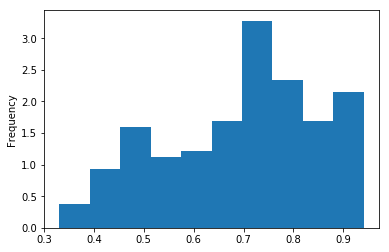

In [116]:
Ano2011Final["HDI"].plot(kind="hist", density = True)
plt.show()

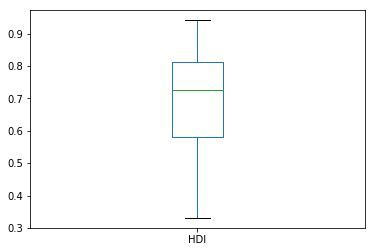

In [117]:
Ano2011Final["HDI"].plot.box()
plt.show()

Analisando mais a fundo o histograma do IDH, podemos notar que o gráfico tem uma assimetria para a esquerda, devido a sua cauda. Também podemos perceber que há uma grande quantidade de países na faixa de IDH de 0.7. Podemos aproveitar o boxplot também para notar que a maior parte dos países se encontra no 2° quartil, o que desloca o boxplot para cima, indicando, novamente, a assimetria na distribuição dos dados.

In [118]:
Ano2011Final["Industry % of GDP"].describe()

count    175.000000
mean      29.294971
std       13.648341
min        6.070000
25%       20.750000
50%       27.300000
75%       34.950000
max       77.900000
Name: Industry % of GDP, dtype: float64

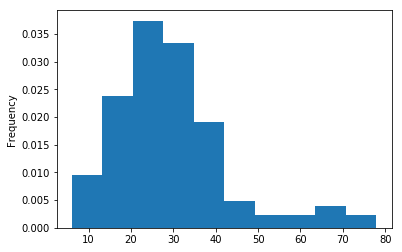

In [119]:
Ano2011Final["Industry % of GDP"].plot(kind="hist", density = True)
plt.show()

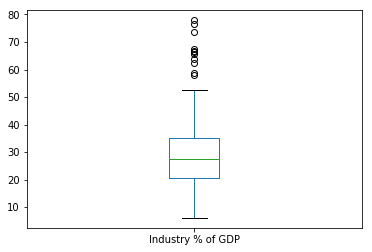

In [120]:
Ano2011Final["Industry % of GDP"].plot.box()
plt.show()

Na análise de dados da % que a indústria representa do PIB, podemos notar uma diferença óbvia em relação a análise do IDH. Há assimetria, mas esta se encontra para a direita. Esta assimetria se deve a presença forte de outliars, como podemos ver no boxplot: o boxplot em si tem uma distribuição bem equilibrada, mas há outliars na faixa de 55% do PIB.

In [121]:
Ano2011Final["Pop. Dens. per square km"].describe()

count     175.00000
mean      186.73680
std       592.51044
min         1.78000
25%        33.80000
50%        77.40000
75%       169.50000
max      7390.00000
Name: Pop. Dens. per square km, dtype: float64

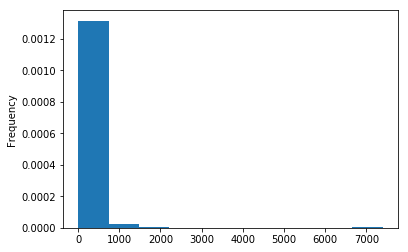

In [122]:
Ano2011Final["Pop. Dens. per square km"].plot(kind="hist", density = True)
plt.show()

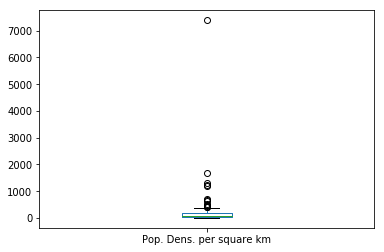

In [123]:
Ano2011Final["Pop. Dens. per square km"].plot.box()
plt.show()

Nos dados de densidade populacional, há um problema: a presença de outliars confunde muito a análise dos dados, isto devido a alguns deles terem valores absurdos. Um exemplo bom é o Vaticano, que tem poucas pessoas nele, mas devido a sua área muito pequena, a densidade populacional sobe muito. Para analisar melhor estes dados, escolheu-se remover os países que possuem densidade populacional maior que 400 pessoas por quilômetro quadrado, visto que esta faixa remove poucos países da análise dos dados e gera uma distribuição mais clara.

In [124]:
Ano2011Final_semoutliar = Ano2011Final[Ano2011Final["Pop. Dens. per square km"]<=400]
Ano2011Final_semoutliar["Pop. Dens. per square km"].describe()

count    162.000000
mean      96.320617
std       87.246373
min        1.780000
25%       31.400000
50%       73.300000
75%      128.250000
max      364.000000
Name: Pop. Dens. per square km, dtype: float64

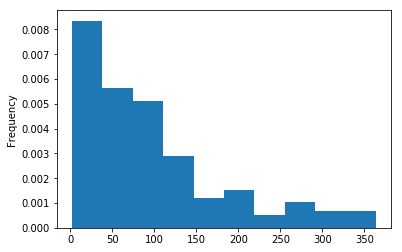

In [125]:
Ano2011Final_semoutliar["Pop. Dens. per square km"].plot(kind="hist", density = True)
plt.show()

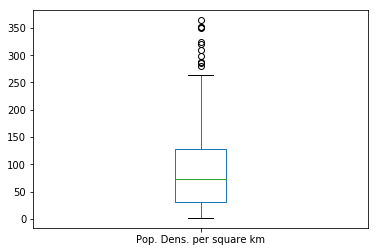

In [126]:
Ano2011Final_semoutliar["Pop. Dens. per square km"].plot.box()
plt.show()

Com os outliars removidos, pode-se notar que a distribuição de densidades populacionais é extremamente assimétrica para a direita, visto que o histograma se inicia com dados de maior frequência e depois tende a cair. Analisando o boxplot, isto fica mais tangível: a maior parte dos países se encontra entre o 3° e 4° quartil. É possível notar que ainda há valores aberrantes, mas eles não atrapalham tanto assim a dispersão de dados.

In [147]:
#equação da reta média, obtida através de um link disponibilizado no BlackBoard
#link: https://pastebin.com/0KcDyqKq
#vale notar que foram feitas algumas alterações para funções esteticas
def reta(dados_x, dados_y,nome_eixo_x,nome_eixo_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(str(nome_eixo_x)+" versus "+str(nome_eixo_y))
    plt.xlabel(str(nome_eixo_x))
    plt.ylabel(str(nome_eixo_y))
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 19.32439647064263
Coeficiente angular: 14.391470098130524


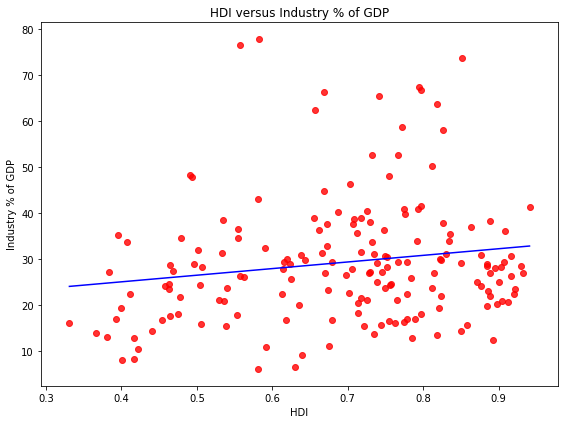

2011 IDH  2011 Industry % of GDP
2011 IDH                1.000000                0.162098
2011 Industry % of GDP  0.162098                1.000000

In [158]:
reta(Ano2011Final["HDI"],Ano2011Final["Industry % of GDP"],"HDI","Industry % of GDP")
Junto_1.corr()

Com base no scatter, pode-se notar que há uma correlação positiva entre o IDH e a % que a indústria representa do PIB: com um aumento de 0.1 no IDH, a % da indústria aumenta em 1.4%. Vale notar, porém, que esta correlação tem valor baixo (0.162), o que indica que os dados praticamente não são relacionados entre si.

Ajuste linear entre X3 e X4:
Coeficiente linear: 32.05229779634503
Coeficiente angular: 93.28687050984354


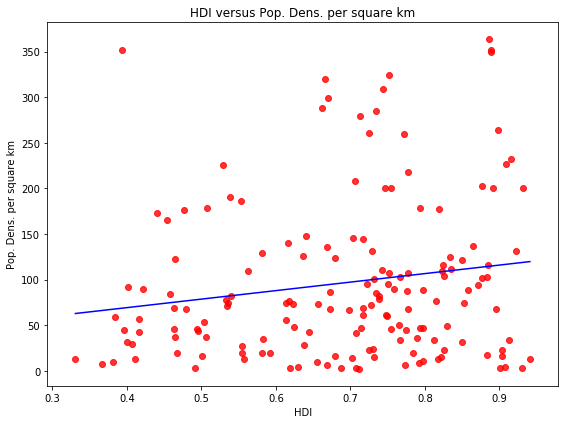

2011 IDH  2011 Pop. Dens. per square km
2011 IDH                       1.000000                       0.147403
2011 Pop. Dens. per square km  0.147403                       1.000000

In [160]:
reta(Ano2011Final_semoutliar["HDI"],Ano2011Final_semoutliar["Pop. Dens. per square km"],"HDI","Pop. Dens. per square km")
Junto_2 = IDH_2011_fix.join(Dens_2011_fix,how="inner",lsuffix=" IDH",rsuffix=" Pop. Dens. per square km")
Junto_2.corr()

Neste outro scatter, pode-se dizer que o comportamento é similar ao do anterior: a correlação entre os dados é positiva, logo, um aumento do IDH de 0.1 gera um aumento de aproximadamente 9.33 na densidade populacional. Assim como no scatter visto previamente, a correlação entre as duas variáveis é baixa, indicando novamente que os dados tem pouca relação entre si.

Ajuste linear entre X3 e X4:
Coeficiente linear: 134.54702546136355
Coeficiente angular: -1.288793412876718


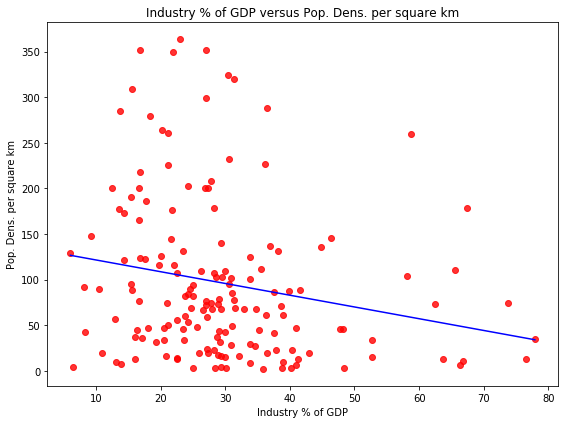

2011 Industry % of GDP  \
2011 Industry % of GDP                       1.000000   
2011 Pop. Dens. per square km               -0.063886   

                               2011 Pop. Dens. per square km  
2011 Industry % of GDP                             -0.063886  
2011 Pop. Dens. per square km                       1.000000

In [161]:
reta(Ano2011Final_semoutliar["Industry % of GDP"],Ano2011Final_semoutliar["Pop. Dens. per square km"],"Industry % of GDP","Pop. Dens. per square km")
Junto_3 = Indu_2011_fix.join(Dens_2011_fix,how="inner",lsuffix=" Industry % of GDP",rsuffix=" Pop. Dens. per square km")
Junto_3.corr()

Por fim, o último scatter mostra o oposto dos outros: a correlação entre as variáveis é negativa, ou seja, quando há um aumento de 1% na % que a indústria representa do PIB, a densidade populacional diminui. A correlação entre os dados é a mais baixa dentre os três scatters analisados (-0.064 aproximadamente), e como se encontra muito próxima de zero, pode-se dizer que não há relação entre as variáveis.

<h2>Conclusão</h2>

Com base na análise dos dados, foi possível extrair que há pouca/nenhuma relação entre as variáveis. Uma informação que merece destaque é os extremos na análise original da densidade populacional, o que gera forte desequilíbrio na leitura dos dados, e torna necessário o descarte destes extremos. Outro detalhe importante é a baixa presença em termos gerais da indústria no PIB dos países, logo, é esperado que a maior parte dos países seja industrializado ou esteja no processo final de industrialização, e isto fica evidente na mediana estar abaixo dos 30% do PIB.